# External dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [42]:
weather = pd.read_csv("../preprocessed_data/2676617.csv")
weather = weather.drop(['STATION'], axis = 1)
weather

,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT06,WT08
0,2018-01-01,0.00,0.0,0.0,NaN,19,7,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,0.00,0.0,0.0,NaN,26,13,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,0.00,0.0,0.0,NaN,30,16,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-04,0.76,9.8,1.2,NaN,29,19,1.0,1.0,NaN,NaN,NaN,1.0
4,2018-01-05,0.00,0.0,7.1,NaN,19,9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2018-09-26,0.21,0.0,0.0,NaN,82,69,1.0,NaN,1.0,NaN,NaN,NaN
269,2018-09-27,0.00,0.0,0.0,NaN,72,61,NaN,NaN,NaN,NaN,NaN,1.0
270,2018-09-28,0.77,0.0,0.0,NaN,65,56,1.0,NaN,NaN,NaN,NaN,NaN
271,2018-09-29,0.00,0.0,0.0,NaN,72,58,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
weather['TAVG'] = (0.5*(weather['TMAX'] + weather['TMIN']) - 32)*5/9
weather['Extrem'] = weather[['WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08']].sum(axis=1) > 0
weather = weather.drop(['TMAX','TMIN','WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08'], axis=1)
weather['date']  = pd.to_datetime(weather['DATE'])
weather = weather.drop(['DATE'],axis=1)
weather

,PRCP,SNOW,SNWD,TAVG,Extrem,date
0,0.00,0.0,0.0,-10.555556,False,2018-01-01
1,0.00,0.0,0.0,-6.944444,False,2018-01-02
2,0.00,0.0,0.0,-5.000000,False,2018-01-03
3,0.76,9.8,1.2,-4.444444,True,2018-01-04
4,0.00,0.0,7.1,-10.000000,False,2018-01-05
...,...,...,...,...,...,...
268,0.21,0.0,0.0,24.166667,True,2018-09-26
269,0.00,0.0,0.0,19.166667,True,2018-09-27
270,0.77,0.0,0.0,15.833333,True,2018-09-28
271,0.00,0.0,0.0,18.333333,False,2018-09-29


In [16]:
weather.isnull().sum()

DATE      0
PRCP      0
SNOW      0
SNWD      0
TAVG      0
Extrem    0
dtype: int64

In [27]:
y_s1 = pd.read_feather('../preprocessed_data/y_s1.feather')
y_s2 = pd.read_feather('../preprocessed_data/y_s2.feather')
y_s3 = pd.read_feather('../preprocessed_data/y_s3.feather')
y_s3

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,0,2018-07-01 00:28:09,2018-07-01 00:28:51,1,5.30,145,145,2,2.5,0.5,0.5,0.00,0.0,3.80
1,1,2018-07-01 00:29:27,2018-07-01 00:30:17,1,5.30,145,145,2,2.5,0.5,0.5,0.00,0.0,3.80
2,2,2018-07-01 00:04:19,2018-07-01 00:08:29,2,0.70,211,144,1,5.0,0.5,0.5,1.25,0.0,7.55
3,3,2018-07-01 00:14:26,2018-07-01 00:36:35,1,4.80,144,142,1,18.0,0.5,0.5,1.00,0.0,20.30
4,4,2018-07-01 00:41:56,2018-07-01 00:50:54,1,1.80,142,141,2,8.5,0.5,0.5,0.00,0.0,9.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21594885,21594885,2018-09-30 23:06:44,2018-09-30 23:12:40,1,1.07,239,142,2,6.5,0.5,0.5,0.00,0.0,7.80
21594886,21594886,2018-09-30 23:15:34,2018-09-30 23:18:31,1,0.75,142,163,1,4.5,0.5,0.5,1.74,0.0,7.54
21594887,21594887,2018-09-30 23:32:19,2018-09-30 23:41:33,2,2.42,234,161,1,9.5,0.5,0.5,2.16,0.0,12.96
21594888,21594888,2018-09-30 23:03:59,2018-09-30 23:14:09,1,1.99,262,238,1,9.5,0.5,0.5,0.00,0.0,10.80


In [28]:
y_s1['tpep_pickup_datetime'] = pd.to_datetime(y_s1['tpep_pickup_datetime'])
y_s2['tpep_pickup_datetime'] = pd.to_datetime(y_s2['tpep_pickup_datetime'])
y_s3['tpep_pickup_datetime'] = pd.to_datetime(y_s3['tpep_pickup_datetime'])
y_s1['tpep_dropoff_datetime'] = pd.to_datetime(y_s1['tpep_dropoff_datetime'])
y_s2['tpep_dropoff_datetime'] = pd.to_datetime(y_s2['tpep_dropoff_datetime'])
y_s3['tpep_dropoff_datetime'] = pd.to_datetime(y_s3['tpep_dropoff_datetime'])

y_s1['date'] = y_s1['tpep_pickup_datetime'].dt.normalize()
y_s2['date'] = y_s2['tpep_pickup_datetime'].dt.normalize()
y_s3['date'] = y_s3['tpep_pickup_datetime'].dt.normalize()



In [32]:
cal = calendar()
holidays = cal.holidays(start="2018-01-01", end="2018-09-30")
y_s1['holiday'] = y_s1['date'].isin(holidays)
y_s2['holiday'] = y_s2['date'].isin(holidays)
y_s3['holiday'] = y_s3['date'].isin(holidays)


In [45]:
full_s1 = y_s1.merge(weather, on='date')
full_s2 = y_s2.merge(weather, on='date')
full_s3 = y_s3.merge(weather, on='date')


In [52]:
sample1 = full_s1.sample(frac =.1)
sample2 = full_s2.sample(frac =.1)
sample3 = full_s3.sample(frac =.1)
sample = pd.concat([sample1, sample2, sample3])
sample = sample.drop(['index'],axis=1)
# sample is for describing the whole dateset feature

In [54]:
sample.reset_index().to_feather("../preprocessed_data/sample.feather")

## whole dateset representation

In [55]:
sample = pd.read_feather("../preprocessed_data/sample.feather")
sample = sample.drop(['index'],axis=1)

### histogram of trip distance

In [58]:
sample['trip_distance'].describe()

count    7.096487e+06
mean     2.154798e+00
std      1.950859e+00
min      1.000000e-02
25%      9.300000e-01
50%      1.510000e+00
75%      2.600000e+00
max      1.372000e+01
Name: trip_distance, dtype: float64

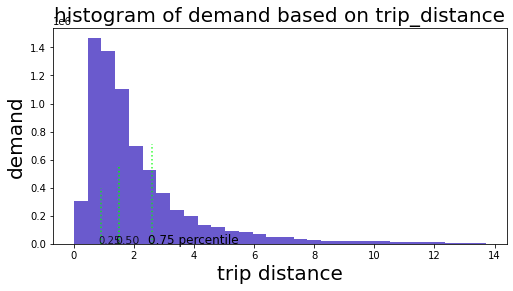

In [78]:
x=sample['trip_distance']
fig=plt.figure(figsize=(9,6))
histax = fig.add_axes([0.2,0.2,0.7,0.5])

h=histax.hist(x,bins=30, color='slateblue')
quants = [[0.93, 0.8, 0.26], [1.51, 1, 0.36],  [2.6, 0.8, 0.46]]

# Plot the lines with a loop
for i in quants:
    histax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='lime')

histax.text(0.93-.1, 0.17, "0.25", size = 10, alpha = 0.8)
histax.text(1.51-.13, 0.27, "0.50", size = 11, alpha = 0.85)
histax.text(2.6-.13, 0.37, "0.75 percentile", size = 12, alpha = 1)

plt.ylabel('demand', fontsize = 20)
plt.xlabel('trip distance', fontsize = 20)
plt.title('histogram of demand based on trip_distance',fontsize = 20)
plt.savefig("../plots/histogram of demand based on trip_distance.png")

plt.show()

### histogram of tip amount

In [80]:
sample['tip_amount'].describe()

count    7.096487e+06
mean     1.505180e+00
std      1.540376e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.350000e+00
75%      2.250000e+00
max      1.479000e+01
Name: tip_amount, dtype: float64

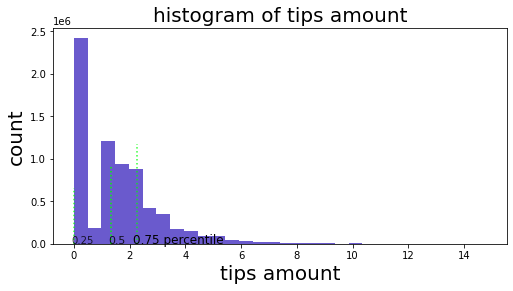

In [84]:
x=sample['tip_amount']
fig=plt.figure(figsize=(9,6))
histax = fig.add_axes([0.2,0.2,0.7,0.5])

h=histax.hist(x,bins=30, color='slateblue')
quants = [[0, 0.8, 0.26], [1.35, 1, 0.36],  [2.25, 0.8, 0.46]]

# Plot the lines with a loop
for i in quants:
    histax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='lime')

histax.text(0-.1, 0.17, "0.25", size = 10, alpha = 0.8)
histax.text(1.35-.13, 0.27, "0.5", size = 11, alpha = 0.85)
histax.text(2.25-.13, 0.37, "0.75 percentile", size = 12, alpha = 1)

plt.ylabel('count', fontsize = 20)
plt.xlabel('tips amount', fontsize = 20)
plt.title('histogram of tips amount',fontsize = 20)
plt.savefig("../plots/histogram of tips amount.png")

plt.show()

### histogram of total amount

In [85]:
sample['total_amount'].describe()

count    7.096487e+06
mean     1.323839e+01
std      7.149946e+00
min      3.300000e+00
25%      8.300000e+00
50%      1.130000e+01
75%      1.595000e+01
max      6.636000e+01
Name: total_amount, dtype: float64

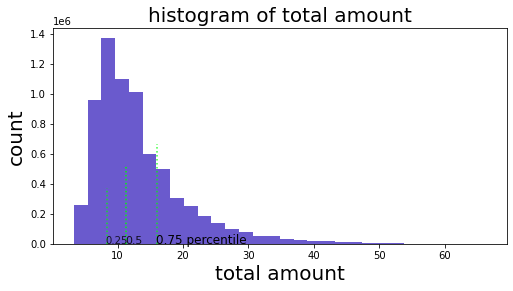

In [87]:
x=sample['total_amount']
fig=plt.figure(figsize=(9,6))
histax = fig.add_axes([0.2,0.2,0.7,0.5])

h=histax.hist(x,bins=30, color='slateblue')
quants = [[8.3, 0.8, 0.26], [11.3, 1, 0.36],  [15.95, 0.8, 0.46]]

# Plot the lines with a loop
for i in quants:
    histax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='lime')

histax.text(08.3-.1, 0.17, "0.25", size = 10, alpha = 0.8)
histax.text(11.3-.13, 0.27, "0.5", size = 11, alpha = 0.85)
histax.text(15.95-.13, 0.37, "0.75 percentile", size = 12, alpha = 1)

plt.ylabel('count', fontsize = 20)
plt.xlabel('total amount', fontsize = 20)
plt.title('histogram of total amount',fontsize = 20)
plt.savefig("../plots/histogram of total amount.png")

plt.show()

### extrem weather vs demand

In [96]:
sample['Extrem'].sum()

3724824

In [114]:
weather['Extrem'].sum()

143

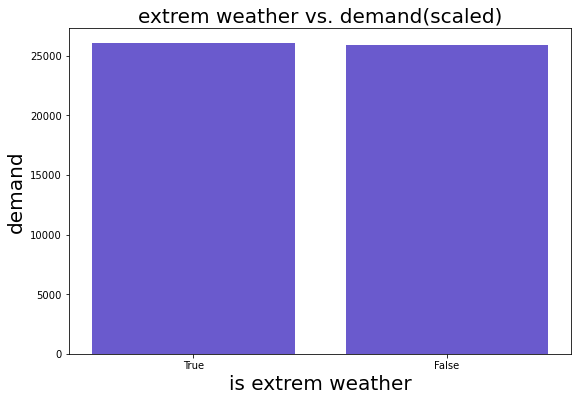

In [158]:
x=['True', 'False']
y=[sample['Extrem'].sum()/weather['Extrem'].sum(), (7.096487e+06-sample['Extrem'].sum())/(273-weather['Extrem'].sum())]

fig=plt.figure(figsize=(9,6))
h = plt.bar(x,y,width=0.8,bottom=None,color = 'slateblue')

plt.ylabel('demand', fontsize = 20)
plt.xlabel('is extrem weather', fontsize = 20)
plt.title('extrem weather vs. demand(scaled)',fontsize = 20)
plt.savefig("../plots/extrem weather vs. demand(scaled).png")

plt.show()

### snow vs. demand

In [112]:
sample[sample['SNOW']>0]['SNOW'].count()

240156

In [123]:
weather[weather['SNOW'] > 0]['SNOW'].count()

10

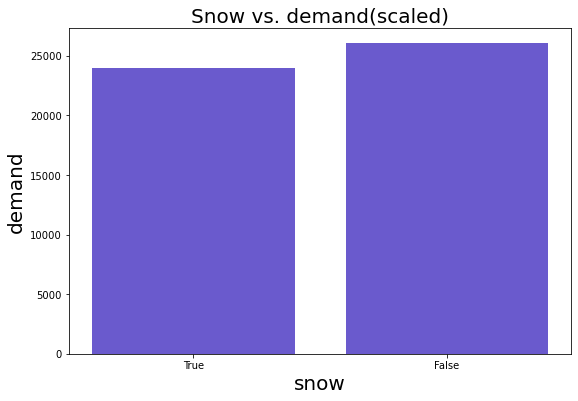

In [157]:
x=['True', 'False']
y=[240156/10, (7.096487e+06-240156)/263]

fig=plt.figure(figsize=(9,6))
h = plt.bar(x,y,width=0.8,bottom=None,color = 'slateblue')

plt.ylabel('demand', fontsize = 20)
plt.xlabel('snow', fontsize = 20)
plt.title('Snow vs. demand(scaled)',fontsize = 20)
plt.savefig("../plots/Snow vs. demand(scaled).png")

plt.show()

### precipitation vs. demand

In [125]:
sample[sample['PRCP']>0]['PRCP'].count()

3115860

In [126]:
weather[weather['PRCP'] > 0]['PRCP'].count()

119

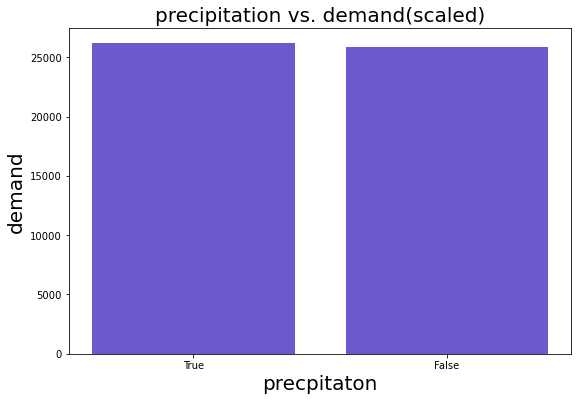

In [155]:
x=['True', 'False']
y=[3115860/119, (7.096487e+06-3115860)/(273-119)]

fig=plt.figure(figsize=(9,6))
h = plt.bar(x,y,width=0.8,bottom=None,color = 'slateblue')

plt.ylabel('demand', fontsize = 20)
plt.xlabel('precpitaton', fontsize = 20)
plt.title('precipitation vs. demand(scaled)',fontsize = 20)
plt.savefig("../plots/precipitation vs. demand(scaled).png")

plt.show()

### tempreture vs. demand

In [101]:
sample['TAVG'].describe()

count    7.096487e+06
mean     1.445029e+01
std      1.016751e+01
min     -1.250000e+01
25%      5.555556e+00
50%      1.638889e+01
75%      2.361111e+01
max      3.083333e+01
Name: TAVG, dtype: float64

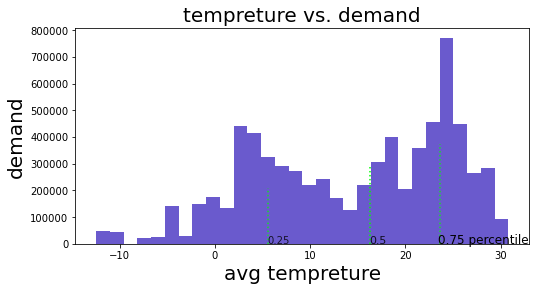

In [103]:
x=sample['TAVG']
fig=plt.figure(figsize=(9,6))
histax = fig.add_axes([0.2,0.2,0.7,0.5])

h=histax.hist(x,bins=30, color='slateblue')
quants = [[5.55, 0.8, 0.26], [16.3, 1, 0.36],  [23.6, 0.8, 0.46]]

# Plot the lines with a loop
for i in quants:
    histax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='lime')

histax.text(5.55-.1, 0.17, "0.25", size = 10, alpha = 0.8)
histax.text(16.3-.13, 0.27, "0.5", size = 11, alpha = 0.85)
histax.text(23.6-.13, 0.37, "0.75 percentile", size = 12, alpha = 1)

plt.ylabel('demand', fontsize = 20)
plt.xlabel('avg tempreture', fontsize = 20)
plt.title('tempreture vs. demand',fontsize = 20)
plt.savefig("../plots/tempreture vs. demand.png")

plt.show()

### day types vs. demand

In [150]:
sample['date'] = pd.to_datetime(sample['date'])
sample['weekday'] = ((pd.DatetimeIndex(sample.date).dayofweek) // 5 == 1).astype(float)

sample[sample['weekday']==1].date.nunique()

78

In [131]:
sample['holiday'].sum() #113465 drives in holidays, 
                        # and we have 6 holidays within the investigation period

113465

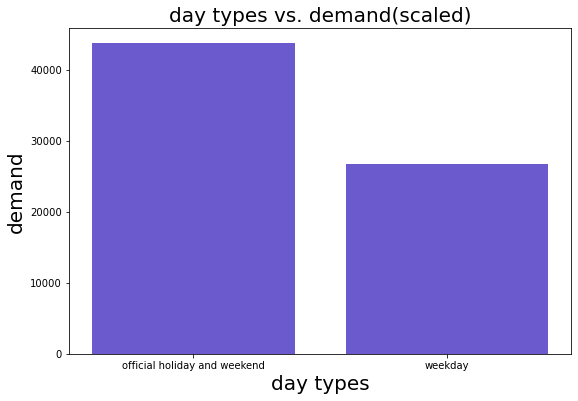

In [161]:
x=['official holiday and weekend', 'weekday']
y=[113465/6+1936439/78,(7.096487e+06-113465-1936439)/(273-6-78)]

fig=plt.figure(figsize=(9,6))
h = plt.bar(x,y,width=0.8,bottom=None,color = 'slateblue')

plt.ylabel('demand', fontsize = 20)
plt.xlabel('day types', fontsize = 20)
plt.title('day types vs. demand(scaled)',fontsize = 20)
plt.savefig("../plots/day types vs. demand(scaled).png")

plt.show()

### check point

In [165]:
sample.to_feather('../preprocessed_data/sample.feather')

### time vs. demand

In [164]:
# 爷累了

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,total_amount,date,holiday,PRCP,SNOW,SNWD,TAVG,Extrem,weekday
0,2018-03-14 22:52:13,2018-03-14 22:55:20,2,0.70,164,170,2,4.5,0.5,0.5,...,0.0,5.80,2018-03-14,False,0.01,0.0,0.0,2.222222,True,0.0
1,2018-02-06 09:53:25,2018-02-06 10:05:49,1,1.97,239,236,1,10.0,0.0,0.5,...,0.0,13.50,2018-02-06,False,0.00,0.0,0.0,-0.277778,False,0.0
2,2018-02-22 13:05:15,2018-02-22 13:12:47,1,1.10,237,262,1,7.0,0.0,0.5,...,0.0,9.35,2018-02-22,False,0.17,0.0,0.0,8.888889,True,0.0
3,2018-02-08 09:22:02,2018-02-08 09:43:31,4,5.54,170,261,1,21.0,0.0,0.5,...,0.0,26.16,2018-02-08,False,0.00,0.0,0.0,-1.666667,False,0.0
4,2018-03-21 08:30:30,2018-03-21 08:44:51,1,6.00,137,168,1,18.0,0.0,0.5,...,0.0,19.80,2018-03-21,False,0.99,8.2,0.0,1.666667,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096482,2018-08-25 10:10:14,2018-08-25 10:23:03,1,2.23,168,263,1,10.5,0.0,0.5,...,0.0,13.56,2018-08-25,False,0.00,0.0,0.0,23.333333,False,1.0
7096483,2018-07-12 21:55:11,2018-07-12 22:26:03,1,7.60,114,74,1,27.0,0.5,0.5,...,0.0,30.30,2018-07-12,False,0.71,0.0,0.0,23.333333,True,0.0
7096484,2018-08-10 05:22:13,2018-08-10 05:28:46,2,1.10,100,164,2,6.5,0.5,0.5,...,0.0,7.80,2018-08-10,False,0.00,0.0,0.0,26.111111,False,0.0
7096485,2018-07-07 23:50:53,2018-07-07 23:56:27,1,1.20,162,107,1,6.5,0.5,0.5,...,0.0,9.20,2018-07-07,False,0.00,0.0,0.0,21.111111,False,1.0



## correlation


In [169]:
sample = sample[['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount']]
# continious features

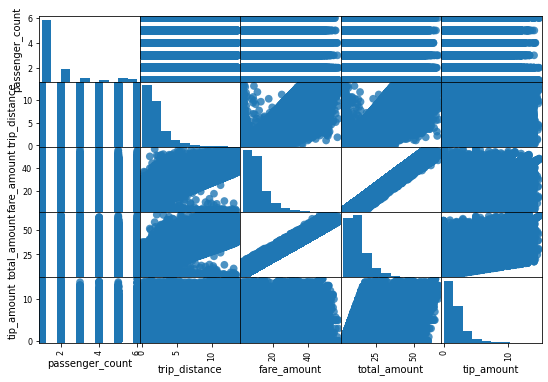

In [170]:
corr = pd.plotting.scatter_matrix(sample, figsize=(9,6), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

plt.show()

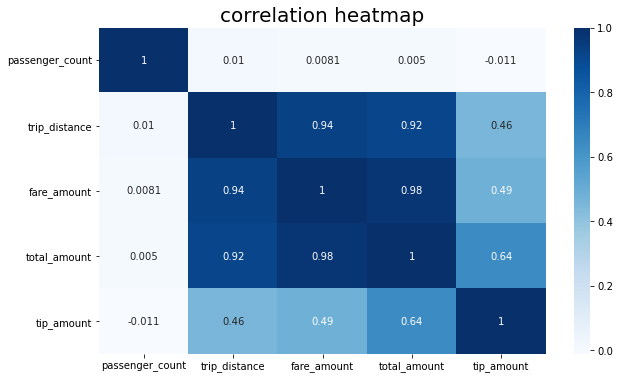

In [174]:
#corr_mat=sample.corr()
#sns.heatmap(cluster_corr(corr_mat), annot = True)
#plt.title("correlation heatmap", fontsize = 20)

#plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(sample.corr(), cmap='Blues', annot = True)
ax.set_title('correlation heatmap',fontsize=20)
plt.savefig("../plots/correlation heatmap.png")


# Classification: whether there will be tips given

In [175]:
sample = pd.read_feather("../raw_data/sample.feather")

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tolls_amount,total_amount,date,holiday,PRCP,SNOW,SNWD,TAVG,Extrem,weekday
0,2018-03-14 22:52:13,2018-03-14 22:55:20,2,0.70,164,170,2,4.5,0.5,0.5,...,0.0,5.80,2018-03-14,False,0.01,0.0,0.0,2.222222,True,0.0
1,2018-02-06 09:53:25,2018-02-06 10:05:49,1,1.97,239,236,1,10.0,0.0,0.5,...,0.0,13.50,2018-02-06,False,0.00,0.0,0.0,-0.277778,False,0.0
2,2018-02-22 13:05:15,2018-02-22 13:12:47,1,1.10,237,262,1,7.0,0.0,0.5,...,0.0,9.35,2018-02-22,False,0.17,0.0,0.0,8.888889,True,0.0
3,2018-02-08 09:22:02,2018-02-08 09:43:31,4,5.54,170,261,1,21.0,0.0,0.5,...,0.0,26.16,2018-02-08,False,0.00,0.0,0.0,-1.666667,False,0.0
4,2018-03-21 08:30:30,2018-03-21 08:44:51,1,6.00,137,168,1,18.0,0.0,0.5,...,0.0,19.80,2018-03-21,False,0.99,8.2,0.0,1.666667,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096482,2018-08-25 10:10:14,2018-08-25 10:23:03,1,2.23,168,263,1,10.5,0.0,0.5,...,0.0,13.56,2018-08-25,False,0.00,0.0,0.0,23.333333,False,1.0
7096483,2018-07-12 21:55:11,2018-07-12 22:26:03,1,7.60,114,74,1,27.0,0.5,0.5,...,0.0,30.30,2018-07-12,False,0.71,0.0,0.0,23.333333,True,0.0
7096484,2018-08-10 05:22:13,2018-08-10 05:28:46,2,1.10,100,164,2,6.5,0.5,0.5,...,0.0,7.80,2018-08-10,False,0.00,0.0,0.0,26.111111,False,0.0
7096485,2018-07-07 23:50:53,2018-07-07 23:56:27,1,1.20,162,107,1,6.5,0.5,0.5,...,0.0,9.20,2018-07-07,False,0.00,0.0,0.0,21.111111,False,1.0
